In [1]:
import numpy as np
import scipy

from toqito.states import basis
from toqito.matrix_props import is_hermitian
from toqito.matrices import pauli

In [2]:
# su2 generators

e1 = pauli("X")
e2 = pauli("Y")
e3 = pauli("Z")
su2_basis = [e1, e2, e3]

j=1
print("su(2) basis \n")
for i in su2_basis:
    print("Element", j ,"\n", i, "\n")
    j += 1


su(2) basis 

Element 1 
 [[0 1]
 [1 0]] 

Element 2 
 [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]] 

Element 3 
 [[ 1  0]
 [ 0 -1]] 



In [3]:
# add an extra row and column of zeroes to su2 basis elements
extended_basis = []
array_0_2_pos = np.array([[0, 0]])
array_0_3_pos = np.array([[0, 0, 0]])

for i in su2_basis:
    extended_col_ei = np.concatenate((i, array_0_2_pos.T), axis=1)
    extended_ei = np.concatenate((extended_col_ei, array_0_3_pos), axis=0)
    extended_basis.append(extended_ei)

j=1
print("Extended su(2) basis \n")
for i in extended_basis:
    print("Extended Element", j ,"\n", i, "\n")
    j += 1



Extended su(2) basis 

Extended Element 1 
 [[0 1 0]
 [1 0 0]
 [0 0 0]] 

Extended Element 2 
 [[ 0.+0.j -0.-1.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]] 

Extended Element 3 
 [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  0]] 



In [4]:
# su3 basis elements
e1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
e2 = np.array([[0, -1j, 0], [1j, 0, 0], [0, 0, 0]])
e3 = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 0]])
e4 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
e5 = np.array([[0, 0, -1j], [0, 0, 0], [1j, 0, 0]])
e6 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0]])
e7 = np.array([[0, 0, 0], [0, 0, -1j], [0, 1j, 0]])
e8 = (1/np.sqrt(3))*np.array([[1, 0, 0], [0, 1, 0], [0, 0, -2]])

su3_basis = [e1, e2, e3, e4, e5, e6, e7, e8]

j=1
print("su(3) basis \n")
for i in su3_basis:
    print("Element", j ,"\n", i, "\n")
    j += 1


su(3) basis 

Element 1 
 [[0 1 0]
 [1 0 0]
 [0 0 0]] 

Element 2 
 [[ 0.+0.j -0.-1.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]] 

Element 3 
 [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  0]] 

Element 4 
 [[0 0 1]
 [0 0 0]
 [1 0 0]] 

Element 5 
 [[ 0.+0.j  0.+0.j -0.-1.j]
 [ 0.+0.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j]] 

Element 6 
 [[0 0 0]
 [0 0 1]
 [0 1 0]] 

Element 7 
 [[ 0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.-1.j]
 [ 0.+0.j  0.+1.j  0.+0.j]] 

Element 8 
 [[ 0.57735027  0.          0.        ]
 [ 0.          0.57735027  0.        ]
 [ 0.          0.         -1.15470054]] 



In [5]:
# verify some elements of su2 are in su3
embedding_counter = 0

for i in extended_basis:
    for j in su3_basis:
        diff = np.abs(np.subtract(i, j))
        if np.all(diff == np.zeros((3,3))):
            print(i, "\n an element in the extended su2 basis is also an element in the su3 basis as \n",j, "\n")
            embedding_counter += 1

print(embedding_counter, " is the total number of su2 extended basis elements embedded in su3.")

[[0 1 0]
 [1 0 0]
 [0 0 0]] 
 an element in the extended su2 basis is also an element in the su3 basis as 
 [[0 1 0]
 [1 0 0]
 [0 0 0]] 

[[ 0.+0.j -0.-1.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]] 
 an element in the extended su2 basis is also an element in the su3 basis as 
 [[ 0.+0.j -0.-1.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]] 

[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  0]] 
 an element in the extended su2 basis is also an element in the su3 basis as 
 [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  0]] 

3  is the total number of su2 extended basis elements embedded in su3.


In [6]:
# extend the su3 basis
# add an extra row and column of zeroes to su2 basis elements
extended_su3_basis = []
array_0_3_pos = np.array([[0, 0, 0]])
array_0_4_pos = np.array([[0, 0, 0, 0]])

for i in su3_basis:
    extended_col_ei = np.concatenate((i, array_0_3_pos.T), axis=1)
    extended_ei = np.concatenate((extended_col_ei, array_0_4_pos), axis=0)
    extended_su3_basis.append(extended_ei)

j=1
print("Extended su(3) basis \n")
for i in extended_su3_basis:
    print("Extended Element", j ,"\n", i, "\n")
    j += 1



Extended su(3) basis 

Extended Element 1 
 [[0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 

Extended Element 2 
 [[ 0.+0.j -0.-1.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 

Extended Element 3 
 [[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]] 

Extended Element 4 
 [[0 0 1 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]] 

Extended Element 5 
 [[ 0.+0.j  0.+0.j -0.-1.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 

Extended Element 6 
 [[0 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 0]] 

Extended Element 7 
 [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.-1.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 

Extended Element 8 
 [[ 0.57735027  0.          0.          0.        ]
 [ 0.          0.57735027  0.          0.        ]
 [ 0.          0.         -1.15470054  0.        ]
 [ 0.          0.      

In [7]:
# definig the basis for matrix representation of su(4) algebra (old basis)
# taken directly from chapter 4 of pfeifer
# note the ordering of elements is different from how it is defined in pfeifer

n = 4
# get the column vectors
dim_4_ket = [basis(n, 0), basis(n, 1), basis(n, 2), basis(n, 3)]

# get the bra
dim_4_bra = []
for i in range(n):
    item = dim_4_ket[i]
    dim_4_bra.append(item.conj().T)

su4_basis = []

# create basis elements where Pauli X moves along the matrix blocks
for i in range(n):
    for k in range(1, n):
        if i < k:
            mat_ik = (np.outer(dim_4_ket[i], dim_4_ket[k])+np.outer(dim_4_ket[k], dim_4_ket[i]))
            su4_basis.append(mat_ik)

# create basis elements where Pauli Y moves along the matrix
for i in range(n):
    for k in range(1, n):
        if i < k:
            mat_ik = (np.outer(dim_4_ket[i], dim_4_ket[k])-np.outer(dim_4_ket[k], dim_4_ket[i]))
            su4_basis.append(-1j*mat_ik)

# append 1 pauli z block
su4_basis.append(np.array([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, 0, 0],[0, 0, 0, 0]]))

# append eq4.2 of pfeifer with a column and row of zeroes
su4_basis.append((1/np.sqrt(3))*np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -2, 0],[0, 0, 0, 0]]))

# append eq4.2 of pfeifer with a column and row of zeroes
su4_basis.append((1/np.sqrt(6))*np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0],[0, 0, 0, -3]]))

# print basis
j = 1
for i in su4_basis:
    print("Basis Element", j, "\n", i, "\n")
    j= j+1

Basis Element 1 
 [[0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 

Basis Element 2 
 [[0 0 1 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]] 

Basis Element 3 
 [[0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]] 

Basis Element 4 
 [[0 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 0]] 

Basis Element 5 
 [[0 0 0 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 1 0 0]] 

Basis Element 6 
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]] 

Basis Element 7 
 [[0.-0.j 0.-1.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Element 8 
 [[0.-0.j 0.-0.j 0.-1.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Element 9 
 [[0.-0.j 0.-0.j 0.-0.j 0.-1.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Element 10 
 [[0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-1.j 0.-0.j]
 [0.-0.j 0.+1.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Element 11 
 [[0.-0.j 0

In [8]:
# verify some elements of su3 are in su4
embedding_counter = 0

for i in extended_su3_basis:
    for j in su4_basis:
        diff = np.abs(np.subtract(i, j))
        if np.all(diff == np.zeros((4,4))):
            print(i, "\n an element in the extended su2 basis is also an element in the su3 basis as \n",j, "\n")
            embedding_counter += 1

print(embedding_counter, " is the total number of su3 extended basis elements embedded in su4.")

[[0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 
 an element in the extended su2 basis is also an element in the su3 basis as 
 [[0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 

[[ 0.+0.j -0.-1.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 
 an element in the extended su2 basis is also an element in the su3 basis as 
 [[0.-0.j 0.-1.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

[[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]] 
 an element in the extended su2 basis is also an element in the su3 basis as 
 [[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]] 

[[0 0 1 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]] 
 an element in the extended su2 basis is also an element in the su3 basis as 
 [[0 0 1 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]] 

[[ 0.+0.j  0.+0.j -0.-1.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]

In [9]:
from sympy.physics.quantum import TensorProduct
# new su(4) basis (Aryan)
list = []
s0 = np.array([[1,0],[0,1]])
s1 = np.array([[0,1],[1,0]])
s2 = np.array([[0,-1j],[1j,0]])
s3 = np.array([[1,0],[0,-1]])
list.append(s0)
list.append(s1)
list.append(s2)
list.append(s3)
#print('list of matrices :',list)
matrix_list = []
for i in list:
    for j in list:
        x = TensorProduct(i,j)
        matrix_list.append(x)
        # print(x, "\n")

su4_basis_new = []

for i in matrix_list[1:]:
    su4_basis_new.append(i)

# print basis
j = 1
for i in su4_basis_new:
    print("Basis Element", j, "\n", i, "\n")
    j= j+1

Basis Element 1 
 [[0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]] 

Basis Element 2 
 [[0.+0.j 0.-1.j 0.+0.j 0.-0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]] 

Basis Element 3 
 [[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0  1  0]
 [ 0  0  0 -1]] 

Basis Element 4 
 [[0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]] 

Basis Element 5 
 [[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]] 

Basis Element 6 
 [[0.+0.j 0.-0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.-0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]] 

Basis Element 7 
 [[ 0  0  1  0]
 [ 0  0  0 -1]
 [ 1  0  0  0]
 [ 0 -1  0  0]] 

Basis Element 8 
 [[0.+0.j 0.+0.j 0.-1.j 0.-0.j]
 [0.+0.j 0.+0.j 0.-0.j 0.-1.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]] 

Basis Element 9 
 [[0.+0.j 0.+0.j 0.-0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.-1.j 0.-0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]] 

Basis Element 10 
 [[ 0.+0.j  0.-0.j  0.-0.j -1.+0.j]
 [ 0.+0.j

In [10]:
# verify if elements of su3 are in new su4 basis
embedding_counter = 0

for i in extended_su3_basis:
    for j in su4_basis_new:
        diff = np.abs(np.subtract(i, j))
        if np.all(diff == np.zeros((4,4))):
            print(i, "\n an element in the extended su2 basis is also an element in the su3 basis as \n",j, "\n")
            embedding_counter += 1

print(embedding_counter, " is the total number of su3 extended basis elements embedded in su4.")

0  is the total number of su3 extended basis elements embedded in su4.


### Relationship between the new and old su4 basis by Aryan

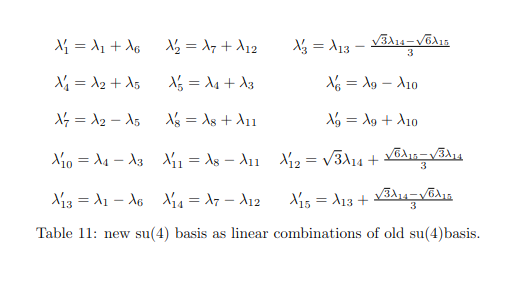


In [11]:
#so(6)
sigma_1=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, -1j, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1j, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_2=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, -1j],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1j, 0, 0]])
sigma_3=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, -1j],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1j, 0, 0, 0, 0]])
sigma_4=np.array([[0, 0, 0, 0, -1j, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1j, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_5=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, -1j],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1j, 0, 0, 0]])
sigma_6=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 1j, 0, 0, 0],
    [0, -1j, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_7=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1j, 0, 0],
    [0, 0, -1j, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_8=np.array([[0, 0, -1j, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [1j, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_9=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1j],
    [0, 0, 0, 0, -1j, 0]])
sigma_10=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, -1j, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1j, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_11=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1j, 0],
    [0, 0, 0, -1j, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_12=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, -1j, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1j, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_13=np.array([[0, 0, 0, 0, 0, 1j], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [-1j, 0, 0, 0, 0, 0]])
sigma_14=np.array([[0, 1j, 0, 0, 0, 0], 
    [-1j, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_15=np.array([[0, 0, 0, -1j, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1j, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])

so6_basis = [sigma_1, sigma_2, sigma_3, sigma_4, sigma_5, sigma_6, sigma_7, sigma_8, sigma_9, sigma_10, sigma_11, sigma_12, sigma_13, sigma_14, sigma_15]
# print basis
j = 1
for i in so6_basis:
    print("Basis Element", j, "\n", i, "\n")
    j= j+1

Basis Element 1 
 [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.-1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 

Basis Element 2 
 [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.-1.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+1.j  0.+0.j  0.+0.j]] 

Basis Element 3 
 [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.-1.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 

Basis Element 4 
 [

In [12]:
# extend the so6 basis
# add an extra row and column of zeroes to su2 basis elements
extended_so6_basis = []
array_0_6_pos = np.array([[0, 0, 0, 0, 0, 0]])
array_0_8_pos = np.array([[0, 0, 0, 0, 0, 0, 0, 0]])

for i in so6_basis:
    extended_col_ei_1 = np.concatenate((i, array_0_6_pos.T), axis=1)
    extended_col_ei_2 = np.concatenate((extended_col_ei_1, array_0_6_pos.T), axis=1)
    extended_ei_1 = np.concatenate((extended_col_ei_2, array_0_8_pos), axis=0)
    extended_ei_2 = np.concatenate((extended_ei_1, array_0_8_pos), axis=0)
    extended_so6_basis.append(extended_ei_2)

j=1
print("Extended so(6) basis \n")
for i in extended_so6_basis:
    print("Extended Element", j ,"\n", i, "\n")
    j += 1

Extended so(6) basis 

Extended Element 1 
 [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.-1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 

Extended Element 2 
 [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.-1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+1.j  0.+0.j  0.+0.j  0.+0.j  0.

In [13]:
# definig the basis for matrix representation of so(8) algebra

n = 8
# get the column vectors
dim_8_ket = [basis(n, 0), basis(n, 1), basis(n, 2), basis(n, 3), basis(n, 4), basis(n, 5), basis(n, 6), basis(n, 7)]
# get the bra
dim_8_bra = []
for i in range(n):
    item = dim_8_ket[i]
    dim_8_bra.append(item.conj().T)

so8_basis = []
for i in range(n):
    for k in range(1, n):
        if i < k:
            m_ik = -1j*(np.outer(dim_8_ket[i], dim_8_ket[k])-np.outer(dim_8_ket[k], dim_8_ket[i]))
            so8_basis.append(m_ik)

# print basis
j = 1
for i in so8_basis:
    print("Basis Element", j, "\n", i, "\n")
    j= j+1


Basis Element 1 
 [[0.-0.j 0.-1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Element 2 
 [[0.-0.j 0.-0.j 0.-1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Element 

In [14]:
# verify if elements of so6 extended are in so8 basis
embedding_counter = 0

for i in extended_so6_basis:
    for j in so8_basis:
        diff = np.abs(np.subtract(i, j))
        if np.all(diff == np.zeros((8,8))):
            print(i, "\n an element in the extended so6 basis is also an element in the so8 basis as \n",j, "\n")
            embedding_counter += 1

print(embedding_counter, " is the total number of su3 extended basis elements embedded in su4.")

[[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.-1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 
 an element in the extended so6 basis is also an element in the so8 basis as 
 [[0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.+1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j